# Prueba de hipótesis $\chi^2$

**Hipótesis nula, $H_0$**

    La muestra tiene una distribución binomial B(n=10,p=0.4)

**Hipótesis alternativa, $H_a$**

    La muestra tiene una distribución distinta a B(n=10,p=0.4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

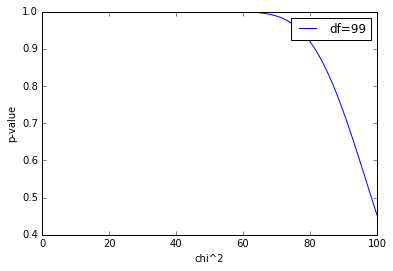

In [2]:
x = np.linspace(0,100.0,100)

for k in range(1,6):
    chi_st = st.chi2.cdf(x,k)
    #plt.plot(x,1.-chi_st,label="df=%d" % k)
    
k = 99
chi_st = st.chi2.cdf(x,k)
plt.plot(x,1.-chi_st,label="df=%d" % k)
plt.legend()
plt.xlabel("chi^2")
plt.ylabel("p-value")

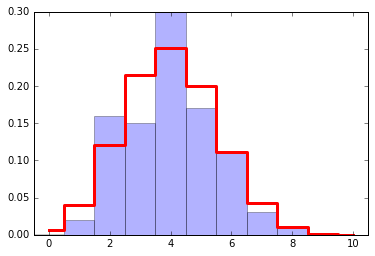

In [3]:
n = 10 
p = 0.4
m = 100

muestra = np.random.binomial(n,p,size=m)

h = plt.hist(muestra,bins=11,range=(-0.5,10.5),normed=True,align='mid',alpha=0.3)
plt.xlim(-0.5,10.5)
plt.ylim(0.0,0.3)

x = np.arange(11)
binom = st.binom(n,p)
y = binom.pmf(x)
plt.step(x,y,where='mid',lw=3,c='r')

Nos preguntamos ahora si nuestra muestra se corresponde con una distribución binomial

In [4]:
def chi2(xo,xt):
    test = (xt-xo)**2/xt
    test = test.sum()
    return test

In [5]:
x_obs = h[0]
x_teo = y

chi = chi2(x_obs,x_teo)
print chi

0.09784065991704195


In [6]:
df = len(x_obs) - 1
alpha = 0.5

chi_test = st.chi2.ppf(1.-alpha,df)
print chi_test

9.34181776559197


In [7]:
if chi < chi_test:
    print "Aceptamos la hipótesis nula"
else:
    print "Rechazamos la hipótesis nula"

Aceptamos la hipótesis nula


# Comparamos con una gaussiana

(0.0, 0.3)

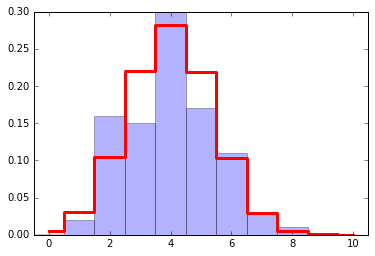

In [8]:
mu = muestra.mean()
sigma = muestra.std()

puntos = np.arange(0,11,dtype=np.float)
x_teo = st.norm.pdf(puntos,loc=mu,scale=sigma)

plt.step(puntos,x_teo,where='mid',lw=3,c='r')

h = plt.hist(muestra,bins=11,range=(-0.5,10.5),normed=True,align='mid',alpha=0.3)
plt.xlim(-0.5,10.5)
plt.ylim(0.0,0.3)

In [9]:
chi = chi2(x_obs,x_teo)
print chi

if chi < chi_test:
    print "Aceptamos la hipótesis nula"
else:
    print "Rechazamos la hipótesis nula"

0.09325763628354009
Aceptamos la hipótesis nula


In [10]:
nchis = 100
chis = np.zeros(nchis)
mus = np.linspace(0.0,8.0,nchis)

for i,mu in enumerate(mus):
    puntos = np.arange(0,11,dtype=np.float)
    x_teo = st.norm.pdf(puntos,loc=mu,scale=sigma)
    chis[i] = chi2(x_obs,x_teo)


(0.0, 50.0)

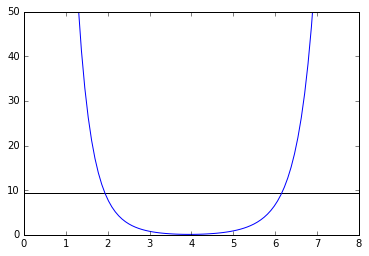

In [11]:
plt.plot(mus,chis)
plt.hlines(chi_test,0.0,8.0)
plt.ylim(0.0,50.0)

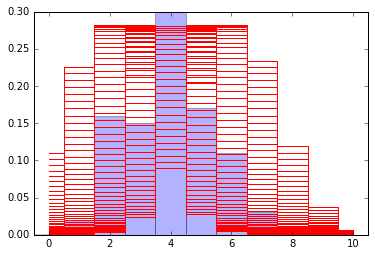

In [12]:
h = plt.hist(muestra,bins=11,range=(-0.5,10.5),normed=True,align='mid',alpha=0.3)
plt.xlim(-0.5,10.5)
plt.ylim(0.0,0.3)

indx = chis < chi_test

puntos = np.arange(0,11,dtype=np.float)
for mu in mus[indx]:
    x_teo = st.norm.pdf(puntos,loc=mu,scale=sigma)
    plt.step(puntos,x_teo,where='mid',lw=1,c='r')

In [14]:
st.chisquare(x_obs,x_teo)

Power_divergenceResult(statistic=8.987791088713951, pvalue=0.5332626401886563)

In [27]:
a = chis[indx]
a[-1]

chi_st = st.chi2.cdf(a[-1],10)
print a[-1],1.-chi_st

8.987791088713951 0.5332626401886563
